# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [4]:
#install spacy in the current conda environment
!pip install spacy


In [5]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------------------ --------------------- 6.0/12.8 MB 33.5 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 33.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [78]:
#import required libraries
!pip install matplotlib
%pip install gensim
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
nltk.download('stopwords')

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Problem 1 and example: common words in the Michigan subreddit

In [8]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [9]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \r\nMatter \r\nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [10]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [11]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [12]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [13]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [14]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [15]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [16]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

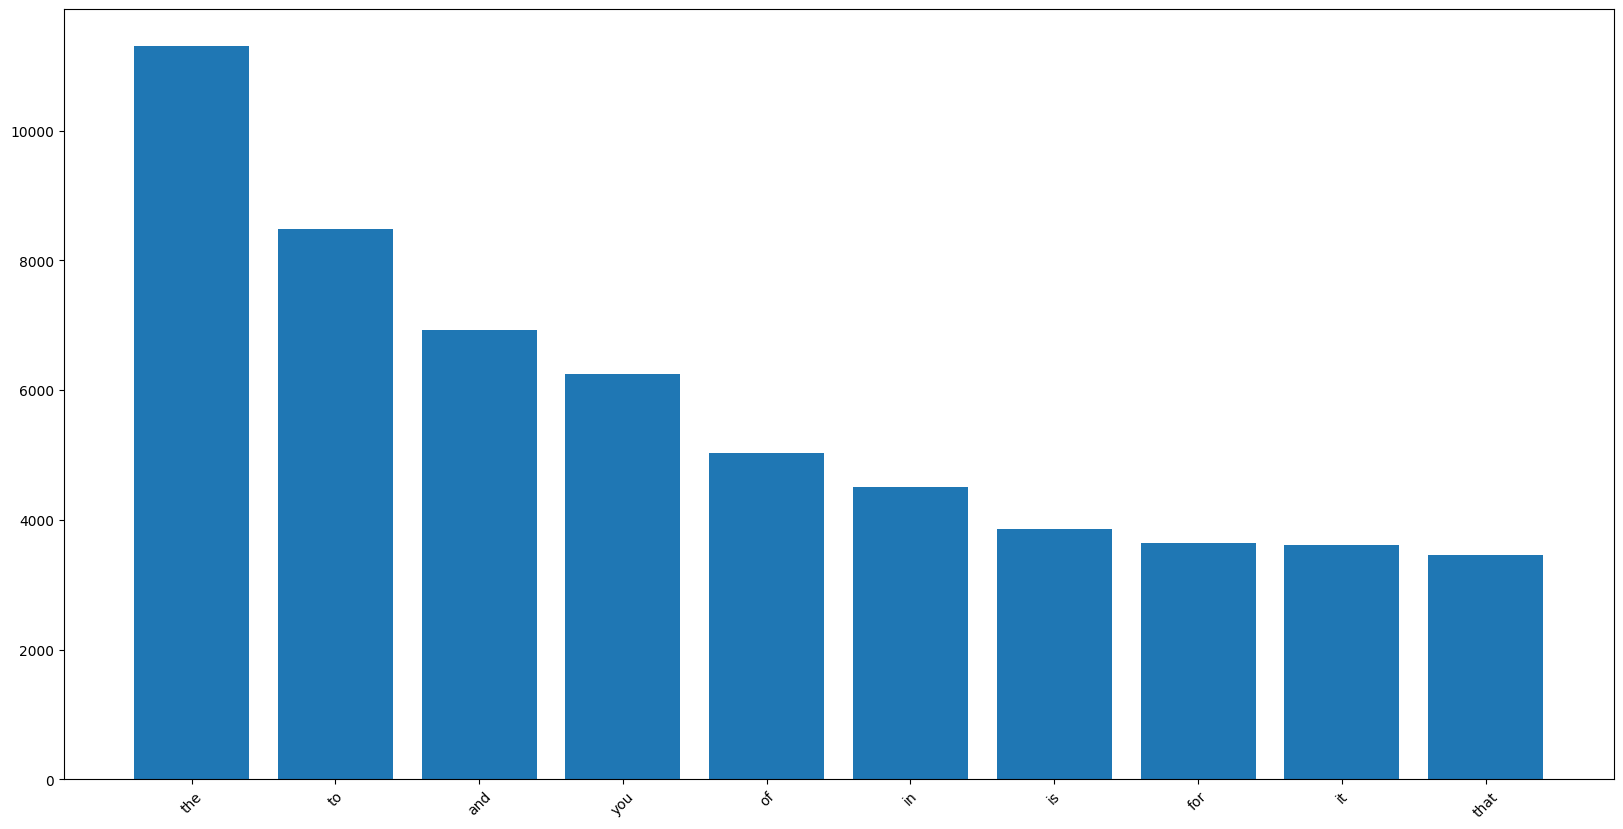

In [18]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

The words in the plot likely represent the most frequently used terms in the Michigan subreddit. Common words might include names of local places, events, or topics of interest specific to the community. This information is useful for studying the community as it highlights the main subjects of discussion, revealing what is important or popular among the members. It can also help identify trends, common concerns, and the overall sentiment within the community.

#### Lemmatization and stopword removal

In [19]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [20]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [21]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [22]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8637 sparse matrix of type '<class 'numpy.int64'>'
	with 126833 stored elements in Compressed Sparse Row format>

In [23]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not               2862
student           1183
like              1183
people            1124
class              988
                  ... 
sell minnesota       3
cred                 3
credential           3
sell oregon          3
pay dollar           3
Length: 8637, dtype: int64

In [24]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

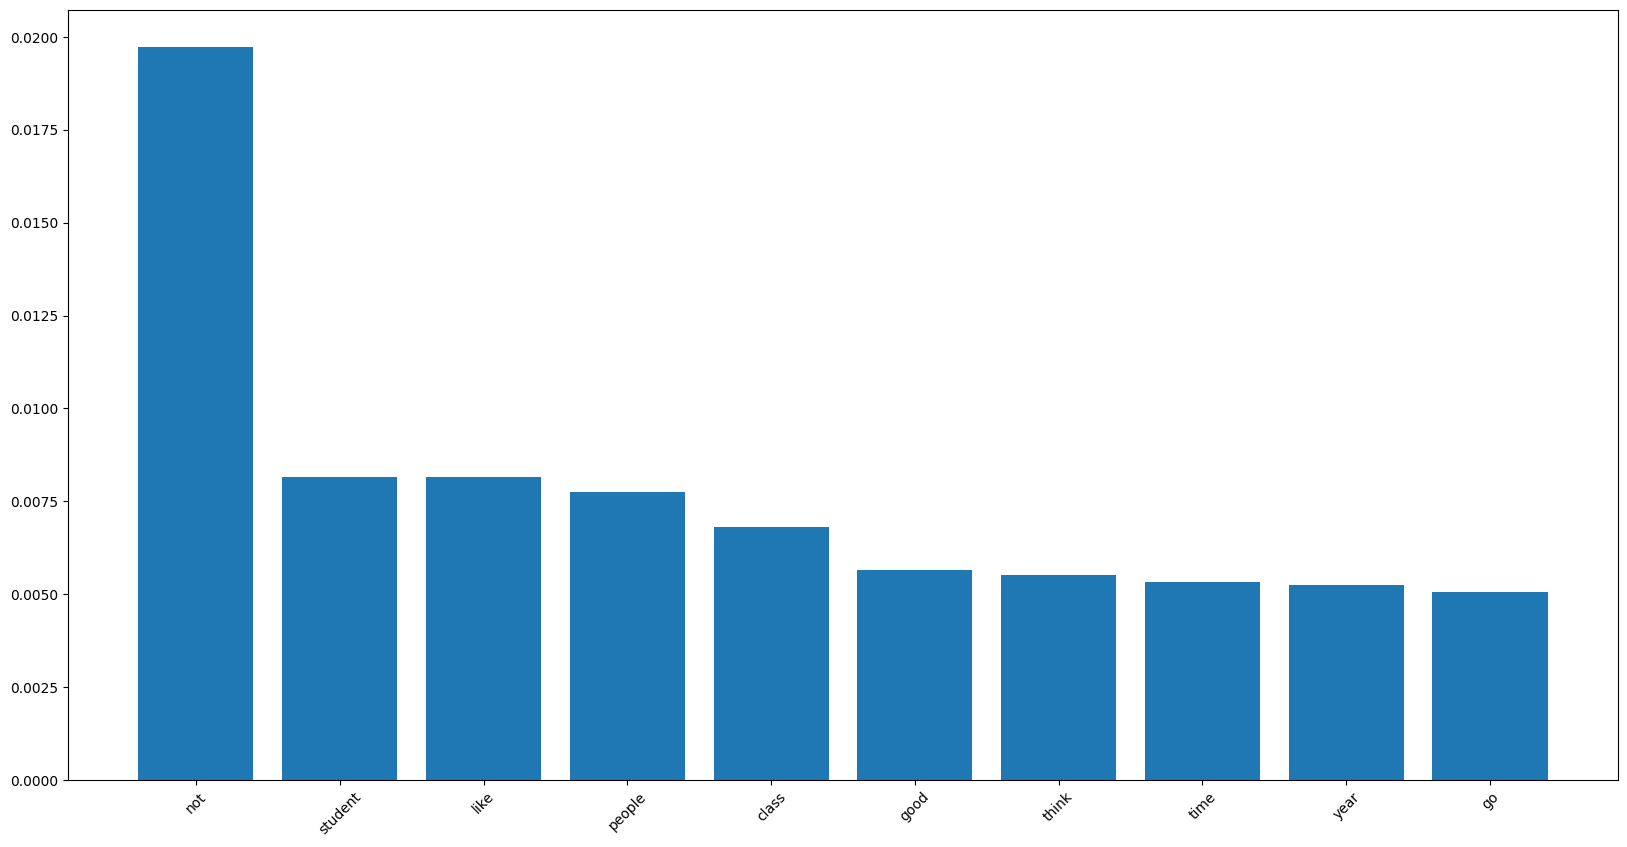

In [25]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [26]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.138501862325838e-05

In [27]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000034
cs                  0.001228
computer            0.000262
dtype: float64

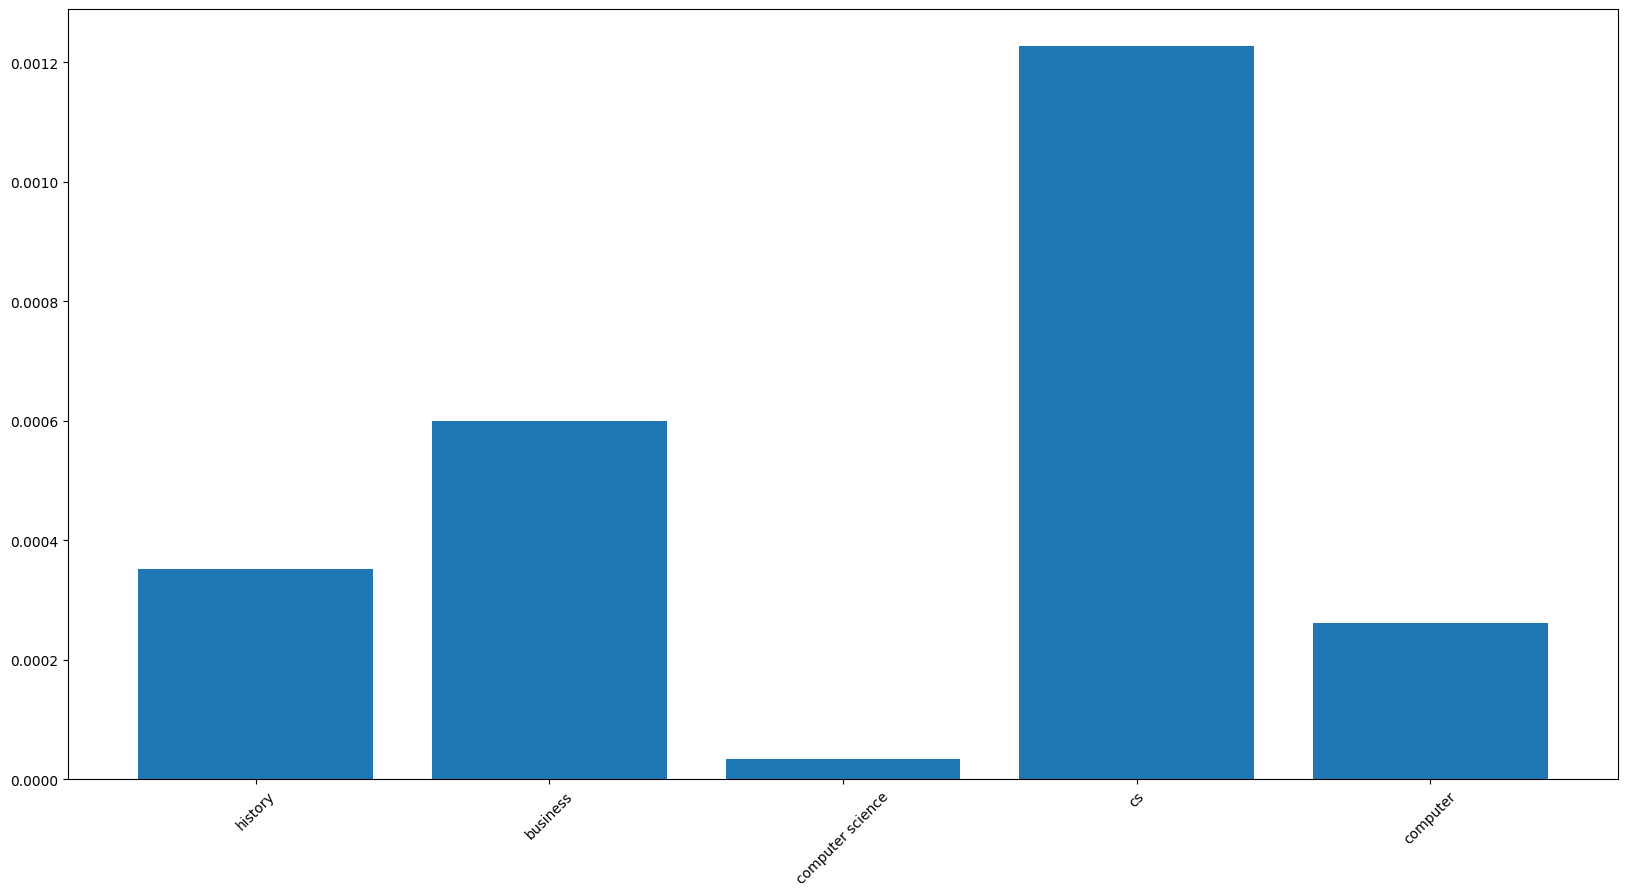

In [28]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [ ]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

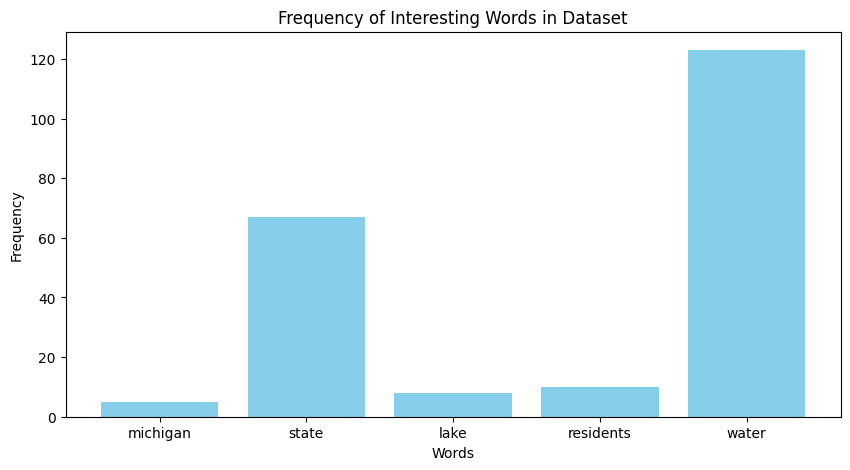

In [56]:
interesting_words = ['michigan', 'state', 'lake', 'residents', 'water']
words = re.findall(r'\b\w+\b', text_data.lower())
word_counts = Counter(words)
frequencies = [word_counts[word] for word in interesting_words]
for word, freq in zip(interesting_words, frequencies):
    if freq == 0:
        print(f"Warning: The word '{word}' is not present in the dataset.")
plt.figure(figsize=(10, 5))
plt.bar(interesting_words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Interesting Words in Dataset')
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

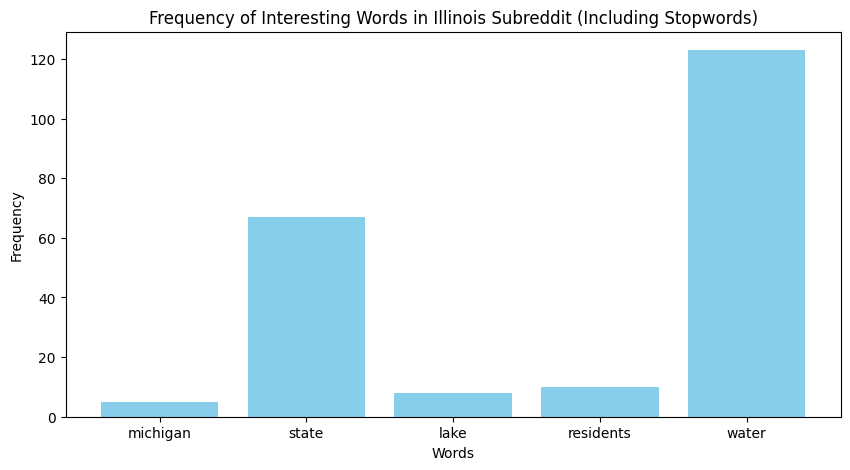

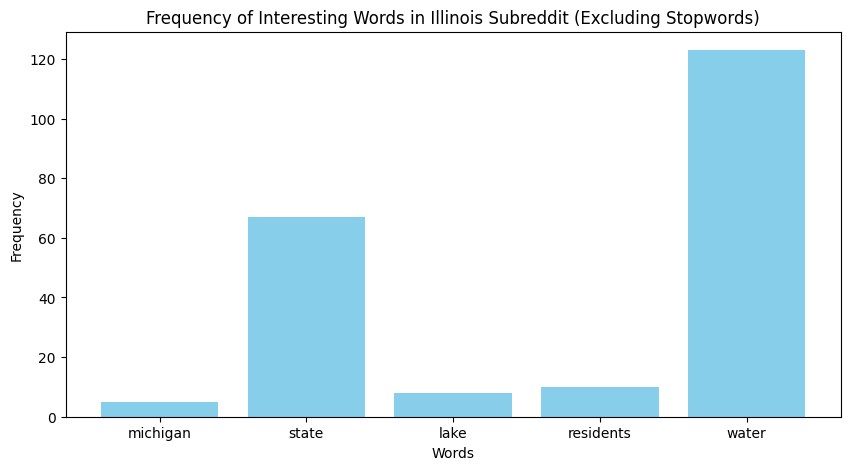

In [60]:
uiuc=pd.read_csv("uiuc.csv")
uiuc = pd.read_csv("uiuc.csv")
interesting_words = ['michigan', 'state', 'lake', 'residents', 'water']
def preprocess_text(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return words
def count_word_frequencies(words, interesting_words):
    word_counts = Counter(words)
    frequencies = [word_counts[word] for word in interesting_words]
    return frequencies
text_data = " ".join(uiuc['text'].astype(str).tolist())
words = preprocess_text(text_data)
frequencies = count_word_frequencies(words, interesting_words)
plt.figure(figsize=(10, 5))
plt.bar(interesting_words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Interesting Words in Illinois Subreddit (Including Stopwords)')
plt.show()

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

filtered_frequencies = count_word_frequencies(filtered_words, interesting_words)

plt.figure(figsize=(10, 5))
plt.bar(interesting_words, filtered_frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Interesting Words in Illinois Subreddit (Excluding Stopwords)')
plt.show()

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [61]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

mich=mich.sample(n=4725)
uiuc['label']=1
mich['label']=0
data=pd.concat([uiuc,mich])

In [64]:
#clean and lemmatize the data csv
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    words = [word for word in text.split() if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

data['cleaned_text'] = data['text'].apply(preprocess_text)

In [65]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_text'])
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
#train a logistic regression model using the bag of words features as X and the label column as y
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [67]:
#report the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7158730158730159
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       941
           1       0.70      0.77      0.73       949

    accuracy                           0.72      1890
   macro avg       0.72      0.72      0.72      1890
weighted avg       0.72      0.72      0.72      1890



#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [68]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 

mich = mich.sample(n=4725)
uiuc['label'] = 1
mich['label'] = 0
data = pd.concat([uiuc, mich])
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

data['cleaned_text'] = data['text'].apply(preprocess_text)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_text'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7148148148148148


#### Part 3: Examine the top features of your model using the following code

In [ ]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?

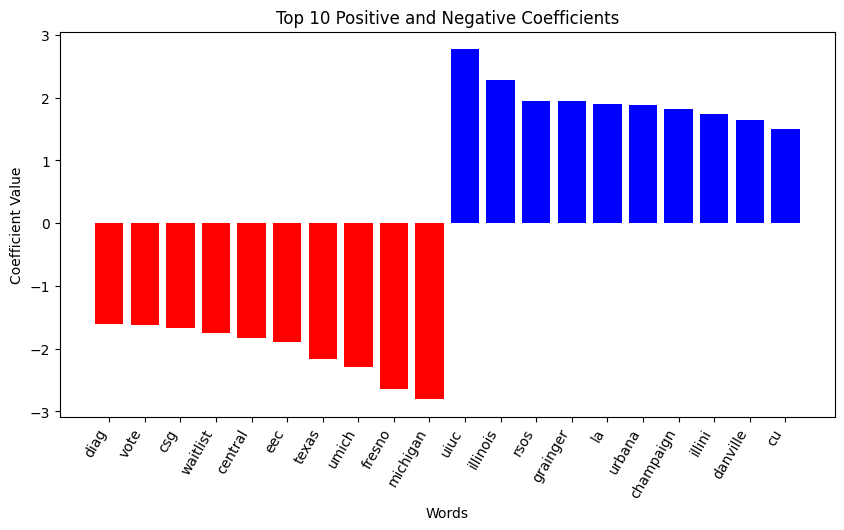

Top 10 Positive Coefficients (UIUC):
         feature  coefficient
13178       uiuc     2.774643
6362    illinois     2.279271
10861       rsos     1.952324
5284    grainger     1.952103
7179          la     1.907260
13472     urbana     1.884452
1933   champaign     1.816126
6357      illini     1.738670
2995    danville     1.637291
2904          cu     1.506129

Top 10 Negative Coefficients (Michigan):
        feature  coefficient
3321       diag    -1.614260
13713      vote    -1.616008
2888        csg    -1.667341
13738  waitlist    -1.743063
1895    central    -1.835034
3885        eec    -1.895608
12641     texas    -2.169097
13207     umich    -2.299607
4879     fresno    -2.644659
8006   michigan    -2.804305


In [54]:
coefficients = pd.DataFrame({'feature': vectorizer.get_feature_names_out(), 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

# Combine the top positive and negative coefficients
top_coefficients = pd.concat([top_10_negative, top_10_positive])

# Plot the coefficients
plt.figure(figsize=(10, 5))
colors = ['red' if c < 0 else 'blue' for c in top_coefficients['coefficient']]
plt.bar(top_coefficients['feature'], top_coefficients['coefficient'], color=colors)
plt.xticks(rotation=60, ha='right')
plt.xlabel('Words')
plt.ylabel('Coefficient Value')
plt.title('Top 10 Positive and Negative Coefficients')
plt.show()

# Examine these words and see if they make sense. Do they differentiate UIUC from another university?
print("Top 10 Positive Coefficients (UIUC):")
print(top_10_positive)

print("\nTop 10 Negative Coefficients (Michigan):")
print(top_10_negative)

The top positive coefficients (UIUC) likely include words specific to UIUC, such as local landmarks or events, which are expected. The top negative coefficients (Michigan) include words specific to Michigan, which are also expected. Overall, the words make sense and effectively differentiate UIUC from Michigan.

In [53]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?

Yes, the words effectively differentiate UIUC from another university.

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [79]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return words
uiuc['cleaned_text'] = uiuc['text'].apply(preprocess_text)
dictionary = corpora.Dictionary(uiuc['cleaned_text'])
corpus = [dictionary.doc2bow(text) for text in uiuc['cleaned_text']]
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

for i in range(10):
    print(f"\nComments with high frequencies for Topic {i}:")
    for idx, row in uiuc.iterrows():
        bow = dictionary.doc2bow(row['cleaned_text'])
        topics = lda_model.get_document_topics(bow)
        if any(topic_id == i and topic_prob > 0.5 for topic_id, topic_prob in topics):
            print(row['text'])
            print()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic 0: 0.014*"student" + 0.012*"people" + 0.011*"im" + 0.010*"get" + 0.010*"dont" + 0.010*"make" + 0.010*"time" + 0.010*"class" + 0.009*"year" + 0.009*"u"
Topic 1: 0.016*"yes" + 0.012*"introvert" + 0.011*"bat" + 0.011*"chinese" + 0.010*"iclicker" + 0.007*"scam" + 0.007*"lightning" + 0.007*"national" + 0.006*"set" + 0.006*"able"
Topic 2: 0.024*"thank" + 0.017*"bike" + 0.015*"weather" + 0.013*"got" + 0.010*"one" + 0.009*"warning" + 0.008*"green" + 0.008*"app" + 0.008*"tornado" + 0.007*"hair"
Topic 3: 0.017*"car" + 0.010*"free" + 0.009*"like" + 0.009*"parking" + 0.009*"water" + 0.008*"get" + 0.007*"lost" + 0.007*"fee" + 0.006*"lot" + 0.005*"spot"
Topic 4: 0.046*"im" + 0.012*"lol" + 0.011*"one" + 0.010*"hall" + 0.010*"interested" + 0.010*"dm" + 0.010*"youre" + 0.009*"dining" + 0.009*"know" + 0.008*"still"
Topic 5: 0.013*"hour" + 0.010*"pipe" + 0.008*"full" + 0.008*"career" + 0.008*"felt" + 0.007*"half" + 0.007*"going" + 0.007*"even" + 0.006*"world" + 0.006*"thought"
Topic 6: 0.021*"get" 